In [2]:
def my_func(fn):
    print("hello world")
    def inner_func():
        fn()
        print("hii, welcome")
    return inner_func()
def fn1():
    print("hey how are you")

In [4]:
my_func(fn1)

hello world
hey how are you
hii, welcome


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("../../Downloads/titanic/tested.csv")

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
df['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

### Exploratory Data Analysis
##### Let's begin some exploratory data analysis we'll start by checking missing data

###  Missing Data
#### we can use seaborn to create a heatmap to see where we are missing data

In [13]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

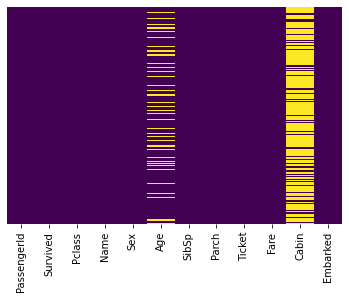

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

<AxesSubplot:xlabel='Survived', ylabel='count'>

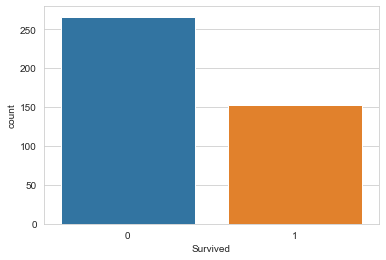

In [31]:
sns.set_style('whitegrid')
sns.countplot(x ='Survived', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

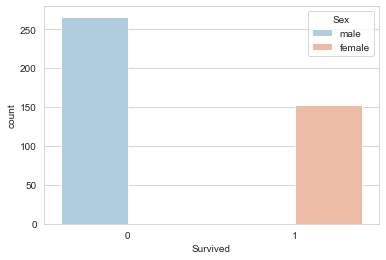

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

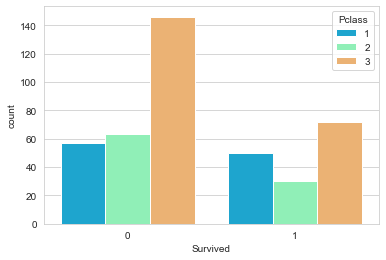

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<AxesSubplot:xlabel='Age'>

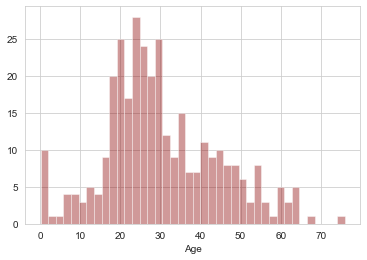

In [43]:
sns.distplot(df['Age'].dropna(), kde=False, color='darkred', bins=40)

<AxesSubplot:>

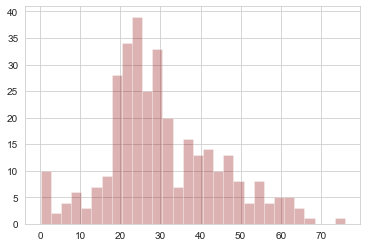

In [44]:
df['Age'].hist(bins=30, color='darkred', alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

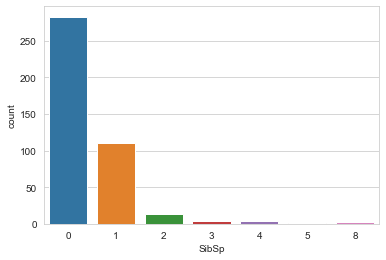

In [53]:
sns.countplot(x='SibSp', data=df)

<AxesSubplot:>

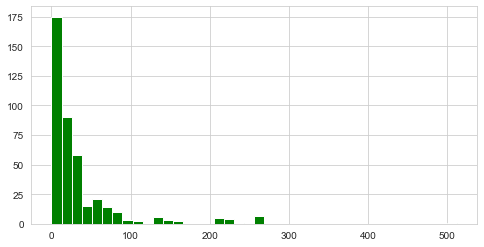

In [58]:
df['Fare'].hist(bins=40, color='green', figsize=(8,4))

### Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

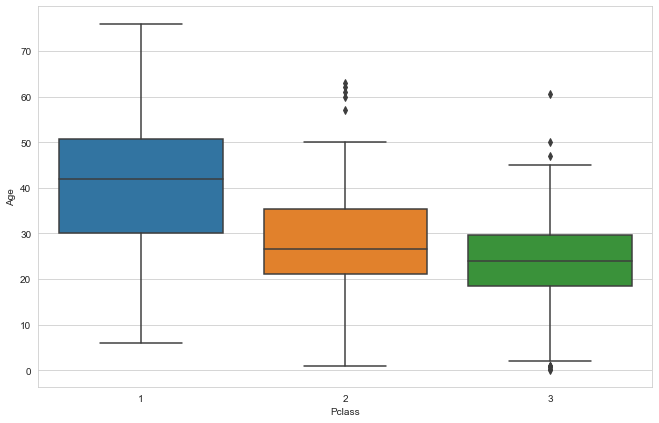

In [62]:
plt.figure(figsize=(11, 7))
sns.boxplot(x='Pclass',y='Age', data=df)

In [63]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 42
        if Pclass == 2:
            return 26
        else:
            return 24
    else:
        return Age
        

In [66]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

#### Let's check the heatmap again

<AxesSubplot:>

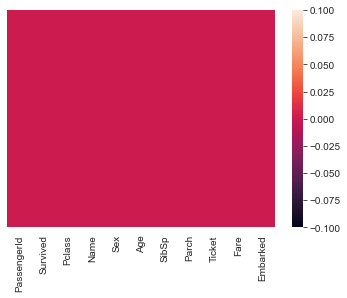

In [76]:
sns.heatmap(df.isnull(), yticklabels=False)

In [70]:
df.drop('Cabin', axis=1, inplace=True)

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [75]:
df.dropna(inplace=True)

### converting categorical Features

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [79]:
df['Embarked'].value_counts()

S    269
C    102
Q     46
Name: Embarked, dtype: int64

In [82]:
pd.get_dummies(df['Embarked'], drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [83]:
sex = pd.get_dummies(df['Sex'], drop_first=True).head()
embark = pd.get_dummies(df['Embarked'], drop_first=True).head()

In [86]:
df.drop(['Sex', 'Embarked', 'Ticket', 'Name'], axis=1, inplace=True)

In [87]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [88]:
df = pd.concat([df, sex, embark], axis=1)

In [114]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1.0,1.0,0.0
1,893,1,3,47.0,1,0,7.0000,0.0,0.0,1.0
2,894,0,2,62.0,0,0,9.6875,1.0,1.0,0.0
3,895,0,3,27.0,0,0,8.6625,1.0,0.0,1.0
4,896,1,3,22.0,1,1,12.2875,0.0,0.0,1.0


### Building a logistic regression model

### Train Test split

In [99]:
X = df.drop('Survived', axis=1)

In [101]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1.0,1.0,0.0
1,893,3,47.0,1,0,7.0000,0.0,0.0,1.0
2,894,2,62.0,0,0,9.6875,1.0,1.0,0.0
3,895,3,27.0,0,0,8.6625,1.0,0.0,1.0
4,896,3,22.0,1,1,12.2875,0.0,0.0,1.0


In [102]:
y = df['Survived']

In [104]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.30, random_state=101)

### Training and Predicting

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').